In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + ECONOMIC INDEX - DATA COMPOSITION 4 (FIXED SET TEST).csv')
df.head(5)

,Month,Tourist Arrival,CCI,PMI,REERI,Class
0,01/01/2008,399556,98,53,109,Train
1,01/02/2008,411032,91,53,108,Train
2,01/03/2008,414332,90,53,106,Train
3,01/04/2008,395900,83,56,106,Train
4,01/05/2008,366387,80,57,106,Train


In [3]:
import datetime
df['Month'] = pd.to_datetime(df['Month'])
df['Month'] = df['Month'].dt.strftime('%d.%m.%Y')
df['Month'] = pd.DatetimeIndex(df['Month']).dayofyear

In [4]:
X=df.drop('Tourist Arrival', axis=1)
y=df['Tourist Arrival']

In [5]:
train = df[df["Class"] == "Train"]
validation = df[df["Class"] == "Validation"]
test = df[df["Class"] == "Test"]
print(train.shape)
print(validation.shape)
print(test.shape)

(133, 6)
(12, 6)
(41, 6)


In [6]:
train = train.drop(['Class'], axis=1)
validation = validation.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)

In [7]:
target_column_train = ['Tourist Arrival']
predictors_train = list(set(list(train.columns))-set(target_column_train))

X_train = train[predictors_train].values
y_train = train[target_column_train].values

print(X_train.shape)
print(y_train.shape)

(133, 4)
(133, 1)


In [8]:
target_column_validation = ['Tourist Arrival'] 
predictors_validation = list(set(list(validation.columns))-set(target_column_validation))

X_validation = validation[predictors_validation].values
y_validation = validation[target_column_validation].values

print(X_validation.shape)
print(y_validation.shape)

(12, 4)
(12, 1)


In [9]:
target_column_test = ['Tourist Arrival'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

X_test = test[predictors_test].values
y_test = test[target_column_test].values

print(X_test.shape)
print(y_test.shape)

(41, 4)
(41, 1)


In [10]:
from sklearn import model_selection
from sklearn.svm import SVR
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics
from scipy import stats
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [11]:
svr_rbf = SVR(kernel='sigmoid', C=10, epsilon=0.05)
svr_rbf.fit(X_train, y_train) 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, epsilon=0.05, kernel='sigmoid')

In [12]:
params = {'C':[0.1, 1, 10, 100, 1000],
          'epsilon':[1, 0.1, 0.001, 0.0001, 0.00001]}

In [13]:
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)


In [14]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, estimator=SVR(C=10, epsilon=0.05, kernel='sigmoid'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [1, 0.1, 0.001, 0.0001, 1e-05]},
             return_train_score=True, scoring='r2', verbose=1)

In [15]:
grid.best_estimator_

SVR(C=0.1, epsilon=1, kernel='sigmoid')

In [16]:
svr_best=SVR(kernel='sigmoid', C=0.1, epsilon=1)
svr_best.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, epsilon=1, kernel='sigmoid')

In [17]:
svr_best.score(X_validation,y_validation)


-33.94938645120294

In [18]:
y_pred=svr_best.predict(X_test)
print(y_pred)

[559002.03397435 559002.02143989 559002.01278542 559002.00836915
 559002.00425047 559002.00354489 559002.00323653 559002.00312353
 559002.00325429 559002.15914064 559002.09195626 559002.05495436
 559002.10224944 559002.05887025 559002.03354237 559002.01875099
 559002.01060585 559002.00473835 559001.99844743 559001.99786711
 559001.99803585 559001.99630908 559001.99767232 559002.17594838
 559002.102569   559002.05932636 559002.03087771 559002.01331814
 559002.00140236 559001.99732462 559001.99686656 559001.99659423
 559001.99647051 559001.99470112 559001.99502348 559002.17473261
 559002.09832691 559002.05842335 559002.03084075 559002.01373423
 559002.00571046]


In [19]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 638013.0012088204


In [20]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 553947.4616139741


In [21]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 5.526266291434571e+20


In [22]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 4620.191617566516


In [23]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : inf


/var/folders/w4/3f8pkphx2j78qktgvt5lpdvw0000gn/T/ipykernel_16504/2542154612.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100


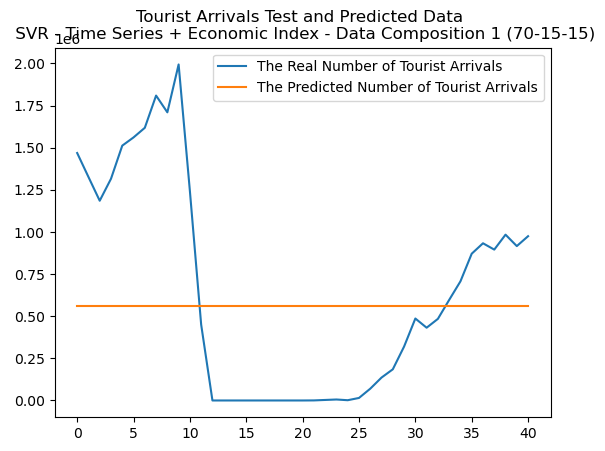

In [24]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SVR - Time Series + Economic Index - Data Composition 1 (70-15-15)")
plt.legend()
plt.show()